In [100]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

# Problem 1

In [101]:
r = requests.get("https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2014KenPomeroy.html")
soup = BeautifulSoup(r.content, "html.parser")
soup.prettify()
#save file
with open("kenpom2014.html", "w") as f:
    f.write(soup.prettify())

table_rowwise = soup.prettify().split("<tbody>")[1].split("<tr>")
Df_2014 = pd.DataFrame(columns = ["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])

for i in range(1, len(table_rowwise)):
    split_row = table_rowwise[i].split("</td>")
    suffix_row = [row.removesuffix("\n          </span>\n         ") for row in split_row]
    value_row = []
    for j in range(2, 22):
        team_name = suffix_row[1].split("\n")[3].removeprefix("           ")
        if j == 2:
            value_row.append(suffix_row[j].split("\n")[3].removeprefix("           "))
        if j in [3,4,5]:
            value_row.append(suffix_row[j].split("\n")[2].removeprefix("          "))
        if j in [6, 8, 10, 12, 14, 16, 18, 20]:
            value_row.append(suffix_row[j].split("\n")[-1].removeprefix("           "))
        if j in [7, 9, 11, 13, 15, 17, 19, 21]:
            value_row.append(suffix_row[7].split("\n")[-2].removeprefix("          "))
    Df_2014.loc[team_name] = value_row


In [102]:
r = requests.get("https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2009KenPomeroy.html")
soup = BeautifulSoup(r.content, "html.parser")
soup.prettify()
#save file
with open("kenpom2014.html", "w") as f:
    f.write(soup.prettify())

table_rowwise = soup.prettify().split("<tbody>")[1].split("<tr>")
Df_2009 = pd.DataFrame(columns = ["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])

for i in range(1, len(table_rowwise)):
    split_row = table_rowwise[i].split("</td>")
    suffix_row = [row.removesuffix("\n          </span>\n         ") for row in split_row]
    value_row = []
    for j in range(2, 22):
        team_name = suffix_row[1].split("\n")[3].removeprefix("           ")
        if j == 2:
            value_row.append(suffix_row[j].split("\n")[3].removeprefix("           "))
        if j in [3,4,5]:
            value_row.append(suffix_row[j].split("\n")[2].removeprefix("          "))
        if j in [6, 8, 10, 12, 14, 16, 18, 20]:
            value_row.append(suffix_row[j].split("\n")[-1].removeprefix("           "))
        if j in [7, 9, 11, 13, 15, 17, 19, 21]:
            value_row.append(suffix_row[7].split("\n")[-2].removeprefix("          "))
    Df_2009.loc[team_name] = value_row
# Df_2009


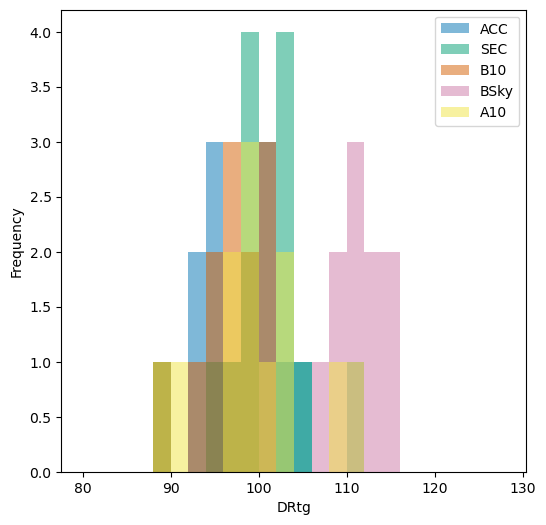

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

colors = {
    "ACC": plt.plot(1,1)[0].get_color(),
    "SEC": plt.plot(1,1)[0].get_color(),
    "B10": plt.plot(1,1)[0].get_color(),
    "BSky": plt.plot(1,1)[0].get_color(),
    "A10": plt.plot(1,1)[0].get_color()
} 
plt.close()


fig, axs = plt.subplots(1, figsize=(6, 6))
bins = np.arange(80,130,2)
for conf in list(colors.keys()):
    axs.hist(Df_2014["DRtg1"][Df_2014["Conf"] == conf].astype(float), bins=bins, label=conf, alpha=0.5, color = colors[conf])

axs.legend()
axs.set_xlabel('DRtg')
axs.set_ylabel('Frequency')

fig.savefig("698a189f4a8987d5c22980ac\\DRtg1_distribution.svg")

# Problem 2

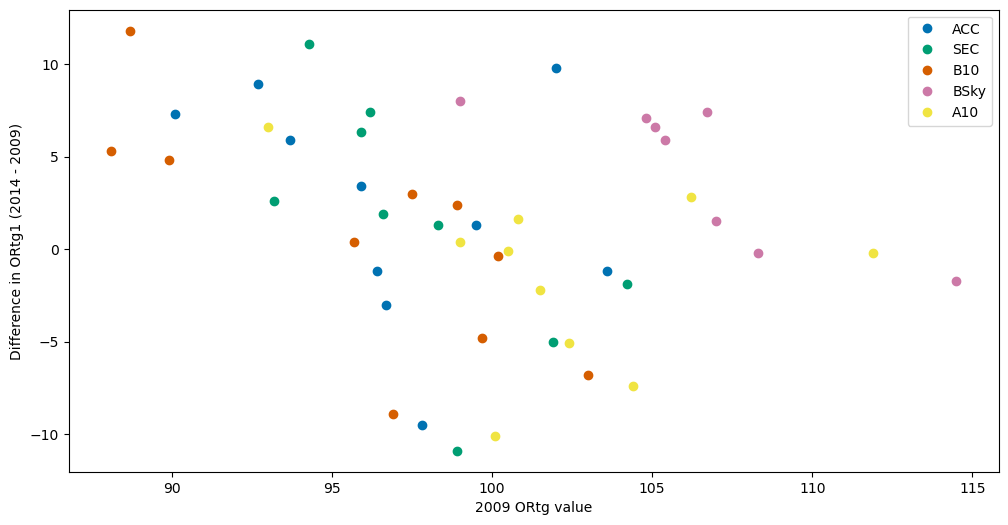

In [104]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
joined_df = Df_2009.join(Df_2014, lsuffix="_2009", rsuffix="_2014", how="inner")
Df_mean_median = pd.DataFrame(columns = ["Conf", "Mean", "Median"])
for conf in list(colors.keys()):
    diff = joined_df["ORtg1_2014"][joined_df["Conf_2009"] == conf].astype(float) - joined_df["ORtg1_2009"][joined_df["Conf_2009"] == conf].astype(float)
    plt.plot(joined_df["ORtg1_2009"][joined_df["Conf_2009"] == conf].astype(float), diff, 'o', label=conf, color=colors[conf])
    Df_mean_median.loc[len(Df_mean_median)] = [conf, np.mean(diff), np.median(diff)]

plt.legend()
plt.xlabel('2009 ORtg value')
plt.ylabel('Difference in ORtg1 (2014 - 2009)')
# plt.title('Difference in ORtg1 between 2014 and 2009 vs 2009 ORtg1 values');
fig.savefig("698a189f4a8987d5c22980ac\\ORtg1_diff_vs_2009.svg")

In [105]:
joined_df_not_in_5 = joined_df[~joined_df['Conf_2009'].isin(list(colors.keys()))]
diff_not_in_5 = joined_df_not_in_5["ORtg1_2014"].astype(float) - joined_df_not_in_5["ORtg1_2009"].astype(float)
Df_mean_median.loc[5] = ["Not in either conf", np.mean(diff_not_in_5), np.median(diff_not_in_5)]
Df_mean_median.to_latex("698a189f4a8987d5c22980ac\\mean_median_diff.tex", index=False, float_format = "%.3f", label = "tab:mean_median_diff",
                        caption = "Mean and median differences in ORtg1 between 2014 and 2009 for selected conferences and teams not in these conferences.",
                        column_format="lc c")

# Problem 3

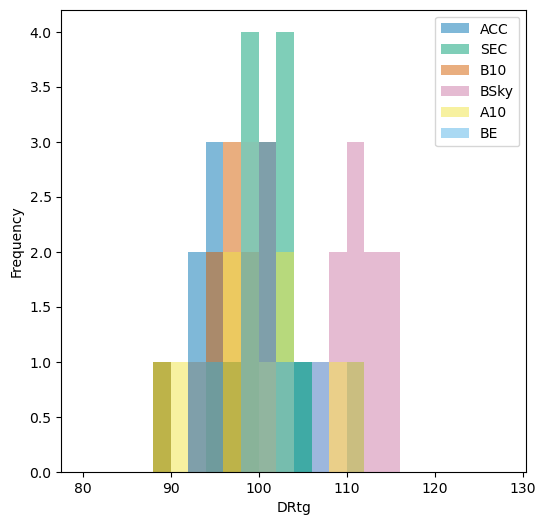

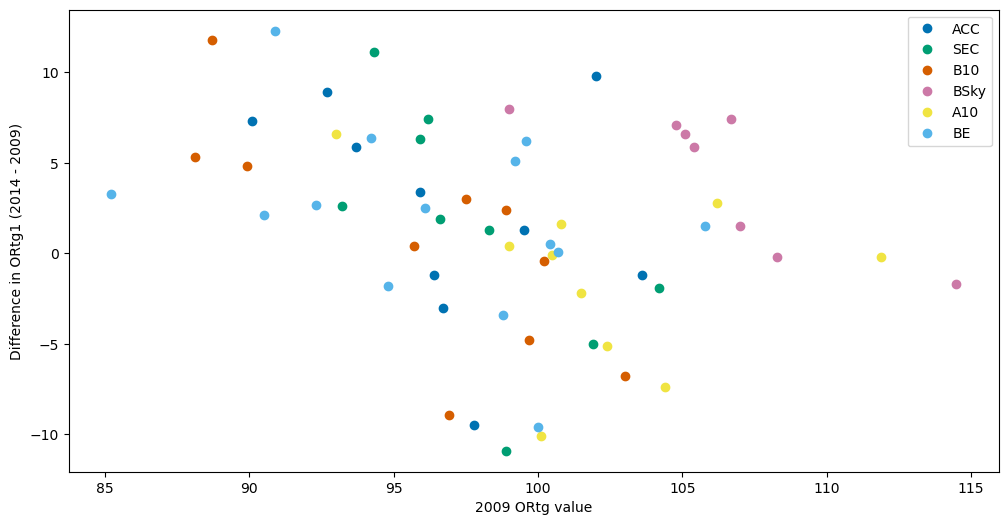

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

colors = {
    "ACC": plt.plot(1,1)[0].get_color(),
    "SEC": plt.plot(1,1)[0].get_color(),
    "B10": plt.plot(1,1)[0].get_color(),
    "BSky": plt.plot(1,1)[0].get_color(),
    "A10": plt.plot(1,1)[0].get_color(),
    "BE": plt.plot(1,1)[0].get_color() # Adding BE to the colors dictionary
}
plt.close()

fig, axs = plt.subplots(1, figsize=(6, 6))
bins = np.arange(80,130,2)
for conf in list(colors.keys()):
    axs.hist(Df_2014["DRtg1"][Df_2014["Conf"] == conf].astype(float), bins=bins, label=conf, alpha=0.5, color = colors[conf])

axs.legend()
axs.set_xlabel('DRtg')
axs.set_ylabel('Frequency')
fig.savefig("698a189f4a8987d5c22980ac\\DRtg1_distribution_with_BE.svg")


fig, axs = plt.subplots(1, 1, figsize=(12, 6))
joined_df = Df_2009.join(Df_2014, lsuffix="_2009", rsuffix="_2014", how="inner")
Df_mean_median = pd.DataFrame(columns = ["Conf", "Mean", "Median"])
for conf in list(colors.keys()):
    diff = joined_df["ORtg1_2014"][joined_df["Conf_2009"] == conf].astype(float) - joined_df["ORtg1_2009"][joined_df["Conf_2009"] == conf].astype(float)
    plt.plot(joined_df["ORtg1_2009"][joined_df["Conf_2009"] == conf].astype(float), diff, 'o', label=conf, color=colors[conf])
    Df_mean_median.loc[len(Df_mean_median)] = [conf, np.mean(diff), np.median(diff)]

plt.legend()
plt.xlabel('2009 ORtg value')
plt.ylabel('Difference in ORtg1 (2014 - 2009)')
# plt.title('Difference in ORtg1 between 2014 and 2009 vs 2009 ORtg1 values');
fig.savefig("698a189f4a8987d5c22980ac\\ORtg1_diff_vs_2009_with_BE.svg")


joined_df_not_in_5 = joined_df[~joined_df['Conf_2009'].isin(list(colors.keys()))]
diff_not_in_5 = joined_df_not_in_5["ORtg1_2014"].astype(float) - joined_df_not_in_5["ORtg1_2009"].astype(float)
Df_mean_median.loc[6] = ["Not in either conf", np.mean(diff_not_in_5), np.median(diff_not_in_5)] #Actually also needed to change a 5 to a 6 here
Df_mean_median.to_latex("698a189f4a8987d5c22980ac\\mean_median_diff_with_BE.tex", index=False, float_format = "%.3f", label = "tab:mean_median_diff_BE",
                        caption = "Mean and median differences in ORtg1 between 2014 and 2009 including BE.",
                        column_format="lc c")

# Extra Credit

In [107]:
# !pip install pypdf

In [108]:
import pypdf

reader = pypdf.PdfReader('AuthorList.pdf')

long_string = ""
for page in reader.pages:
    long_string += page.extract_text()

print(len(reader.pages))

Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 3647 0 (offset 0)
Ignoring wrong pointing object 4274 0 (offset 0)
Ignoring wrong pointing object 4280 0 (offset 0)
Ignoring wrong pointing object 4356 0 (offset 0)
Ignoring wrong pointing object 4367 0 (offset 0)
Ignoring wrong pointing object 4413 0 (offset 0)
Ignoring wrong pointing object 4459 0 (offset 0)
Ignoring wrong pointing object 4515 0 (offset 0)
Ignoring wrong pointing object 4781 0 (offset 0)
Ignoring wrong pointing object 4787 0 (offset 0)
Ignoring wrong pointing object 4858 0 (offset 0)
Ignoring wrong pointing object 5064 0 (offset 0)
Ignoring wrong pointing object 6810 0 (offset 0)
Ignoring wrong pointing object 9701 0 (offset 0)
Ignoring wrong pointing object 9752 0 (offset 0)


11


In [118]:
import re

with open("698a189f4a8987d5c22980ac\\authors_list.txt", "w") as f:
    authors = long_string.split("doi: 10.1117/12.2281024\n")[1].split(" A. Woudt 953\n(SKA South Africa /MeerKAT)")[0]
    authors_list = re.split(r", |,\n", authors)
    authors_list_no_numbers = ["".join(re.findall(r'[A-Za-z\s]+', author)).removesuffix(" ") for author in authors_list]
    only_authors = [author for author in authors_list_no_numbers if (author != "\nThe Astrophysical Journal Letters" and not author.startswith(" October") and author[1] == " ")]

    print("Number of authors:", len(only_authors), "\n", file = f,)
    authors_last_comma_first = [author.split(" ")[-1] + ", " + ". ".join(author.split(" ")[:-1]) + "."for author in only_authors]
    sorted_author = sorted(authors_last_comma_first)
    halfway_index = len(sorted_author) / 2

    if halfway_index.is_integer():
        print("Even number of authors, two middle authors:", file = f)
        middle_authors = (sorted_author[int(halfway_index) - 1], sorted_author[int(halfway_index)])
        print(middle_authors, file = f)
    else:  
        print("Odd number of authors, one middle author:", file = f)
        middle_author = sorted_author[int(halfway_index)]
        print(middle_author, file = f)

# list(set([a[0] for a in sorted_author])) 
##There are no e.g. Álvara, although Ł first names don't appear correctly, which does not matter for sorting by last name